<a href="https://colab.research.google.com/github/shivangtripathi/ml_lab/blob/main/assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
import pandas as pd
df1 = pd.read_csv('AWCustomers.csv')
df1=df1.drop(['Title','FirstName','MiddleName','LastName','Suffix','AddressLine1','AddressLine2','City','PhoneNumber','StateProvinceName','PostalCode','LastUpdated'],axis=1)
df1

,CustomerID,CountryRegionName,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
0,21173,Australia,1987-11-13,Bachelors,Clerical,M,M,1,3,0,1,81916
1,13249,Canada,1972-07-21,Partial College,Clerical,M,M,1,2,1,2,81076
2,29350,United States,1985-11-09,Bachelors,Clerical,F,S,0,3,0,0,86387
3,13503,United Kingdom,1977-10-18,Partial College,Skilled Manual,M,M,1,2,1,2,61481
4,22803,Germany,1975-02-05,Partial College,Skilled Manual,M,S,1,1,0,0,51804
...,...,...,...,...,...,...,...,...,...,...,...,...
18356,25414,United States,1990-11-11,Graduate Degree,Skilled Manual,F,M,0,1,0,2,52953
18357,11459,Australia,1992-10-13,Bachelors,Skilled Manual,F,S,0,2,0,0,60992
18358,12160,United States,1983-11-24,Partial College,Skilled Manual,F,S,0,2,0,0,51859
18359,14353,Canada,1995-06-15,High School,Clerical,F,S,0,0,0,0,87177


In [85]:
countries=pd.get_dummies(df1['CountryRegionName'],drop_first=True)
df1.drop(columns=['CountryRegionName'],axis=1,inplace=True)
df1=pd.concat([countries,df1],axis=1)

In [86]:
df1['BirthDate']= pd.to_datetime(df1['BirthDate'])
import datetime
CURRENT_TIME = datetime.datetime.now()
def get_age(birth_date,today=CURRENT_TIME):
    y=today-birth_date
    return y.days//365

df1['Age']=df1['BirthDate'].apply(lambda x: get_age(x))
df1.drop(['BirthDate'],axis=1,inplace=True)
df1

,Canada,France,Germany,United Kingdom,United States,CustomerID,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,Age
0,0,0,0,0,0,21173,Bachelors,Clerical,M,M,1,3,0,1,81916,33
1,1,0,0,0,0,13249,Partial College,Clerical,M,M,1,2,1,2,81076,49
2,0,0,0,0,1,29350,Bachelors,Clerical,F,S,0,3,0,0,86387,35
3,0,0,0,1,0,13503,Partial College,Skilled Manual,M,M,1,2,1,2,61481,43
4,0,0,1,0,0,22803,Partial College,Skilled Manual,M,S,1,1,0,0,51804,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18356,0,0,0,0,1,25414,Graduate Degree,Skilled Manual,F,M,0,1,0,2,52953,30
18357,0,0,0,0,0,11459,Bachelors,Skilled Manual,F,S,0,2,0,0,60992,28
18358,0,0,0,0,1,12160,Partial College,Skilled Manual,F,S,0,2,0,0,51859,37
18359,1,0,0,0,0,14353,High School,Clerical,F,S,0,0,0,0,87177,26


In [87]:
df1['Education'].value_counts()

Bachelors              5325
Partial College        5024
High School            3274
Graduate Degree        3163
Partial High School    1575
Name: Education, dtype: int64

In [88]:
df1['Education']=df1['Education'].map({'Partial High School':1,'High School':2,'Partial College':3,'Bachelors':4,'Graduate Degree':5})

In [89]:
df1['Occupation']=df1['Occupation'].map({'Manual':1,'Skilled Manual':2,'Clerical':3,'Management':4,'Professional':5})

In [90]:
df1['Male'] = df1['Gender'].map({'M':1,'F':0})
df1['Married'] = df1['MaritalStatus'].map({'M':1,'S':0})

In [91]:
df1.drop('MaritalStatus',inplace=True,axis=1)
df1.drop('Gender',inplace=True,axis=1)

In [92]:
df1.isnull().sum()

Canada                  0
France                  0
Germany                 0
United Kingdom          0
United States           0
CustomerID              0
Education               0
Occupation              0
HomeOwnerFlag           0
NumberCarsOwned         0
NumberChildrenAtHome    0
TotalChildren           0
YearlyIncome            0
Age                     0
Male                    0
Married                 0
dtype: int64

In [93]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1['Age'] = scaler.fit_transform(df1['Age'].values.reshape(-1,1)).flatten()
df1['YearlyIncome'] = scaler.fit_transform(df1['YearlyIncome'].values.reshape(-1,1)).flatten()

In [94]:
df1

,Canada,France,Germany,United Kingdom,United States,CustomerID,Education,Occupation,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,Age,Male,Married
0,0,0,0,0,0,21173,4,3,1,3,0,1,0.496842,0.183099,1,1
1,1,0,0,0,0,13249,3,3,1,2,1,2,0.489453,0.408451,1,1
2,0,0,0,0,1,29350,4,3,0,3,0,0,0.536172,0.211268,0,0
3,0,0,0,1,0,13503,3,2,1,2,1,2,0.317083,0.323944,1,1
4,0,0,1,0,0,22803,3,2,1,1,0,0,0.231958,0.366197,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18356,0,0,0,0,1,25414,5,2,0,1,0,2,0.242065,0.140845,0,1
18357,0,0,0,0,0,11459,4,2,0,2,0,0,0.312781,0.112676,0,0
18358,0,0,0,0,1,12160,3,2,0,2,0,0,0.232442,0.239437,0,0
18359,1,0,0,0,0,14353,2,3,0,0,0,0,0.543121,0.084507,0,0


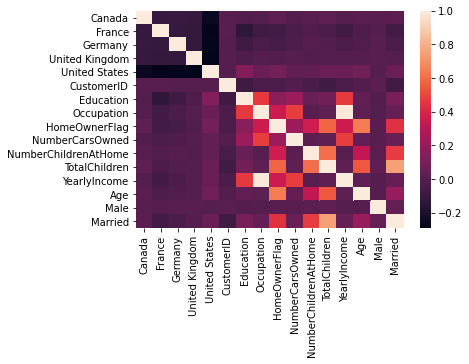

In [97]:
import seaborn as sns 
%matplotlib inline
corr = df1.corr()
sns.heatmap(corr)

In [99]:
from scipy.spatial import distance
distance.cosine(df1['Education'].values,df1['YearlyIncome'].values)
distance.jaccard(df1['Education'].values,df1['YearlyIncome'].values)
from scipy.stats import pearsonr
pearsonr(df1['Education'].values,df1['YearlyIncome'].values)[0]

0.46766483550548943